In [1]:
import torch
import torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
%matplotlib inline
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [2]:
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

In [3]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set threshold for this model
cfg.MODEL.DEVICE = 'cpu'
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_1x.yaml")
predictor = DefaultPredictor(cfg)

In [4]:
predictor = DefaultPredictor(cfg)

In [5]:
cap = cv2.VideoCapture('videos/SAL.mp4')
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
current_frame = 0
WIDTH = cap.get(3)
print(WIDTH)
HEIGHT = cap.get(4)
print(HEIGHT)
FPS = cap.get(5)
print(FPS)

_, frame = cap.read()

1920.0
1080.0
30.05157593123209


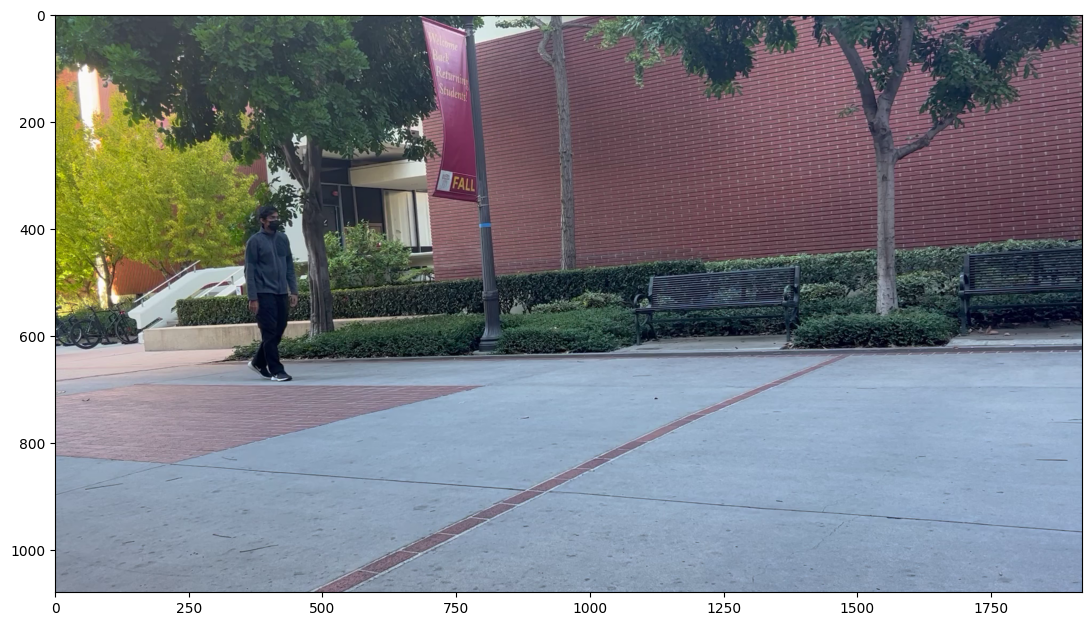

In [6]:
plt.figure(figsize=(15,7.5))
plt.imshow(frame[..., ::-1])

In [7]:
outputs = predictor(frame[..., ::-1])

/home/zhang/miniconda3/envs/csci576/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1666643003845/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
print(outputs)

{'instances': Instances(num_instances=3, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[ 360.6440,  359.5878,  450.3046,  684.9166],
        [1075.8572,  466.8975, 1401.4948,  623.5115],
        [1690.0002,  426.7625, 1916.4841,  593.4463]])), scores: tensor([0.9992, 0.9988, 0.9954]), pred_classes: tensor([ 0, 13, 13]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, Fals

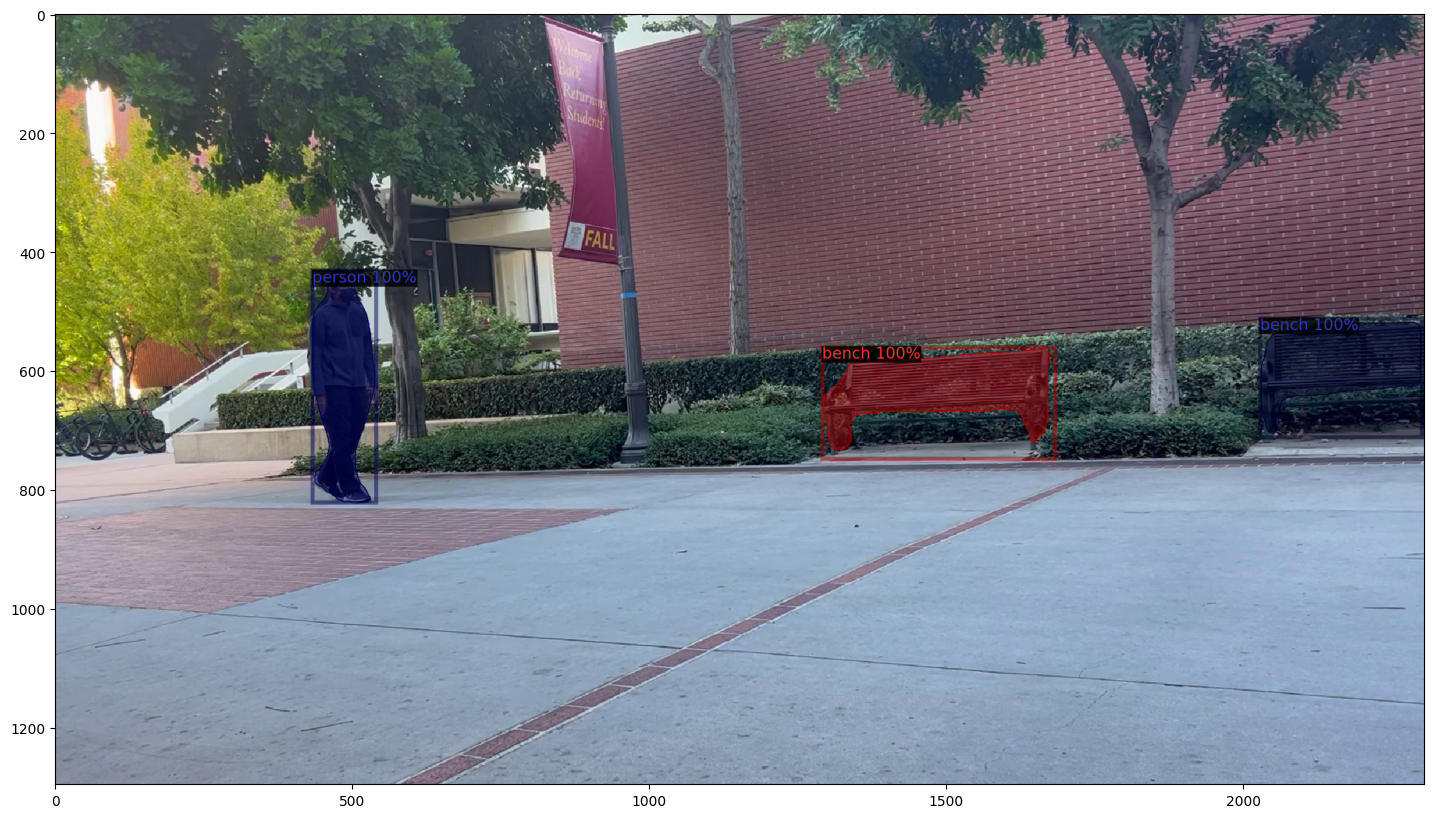

In [9]:
v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(out.get_image()[..., ::-1][..., ::-1])

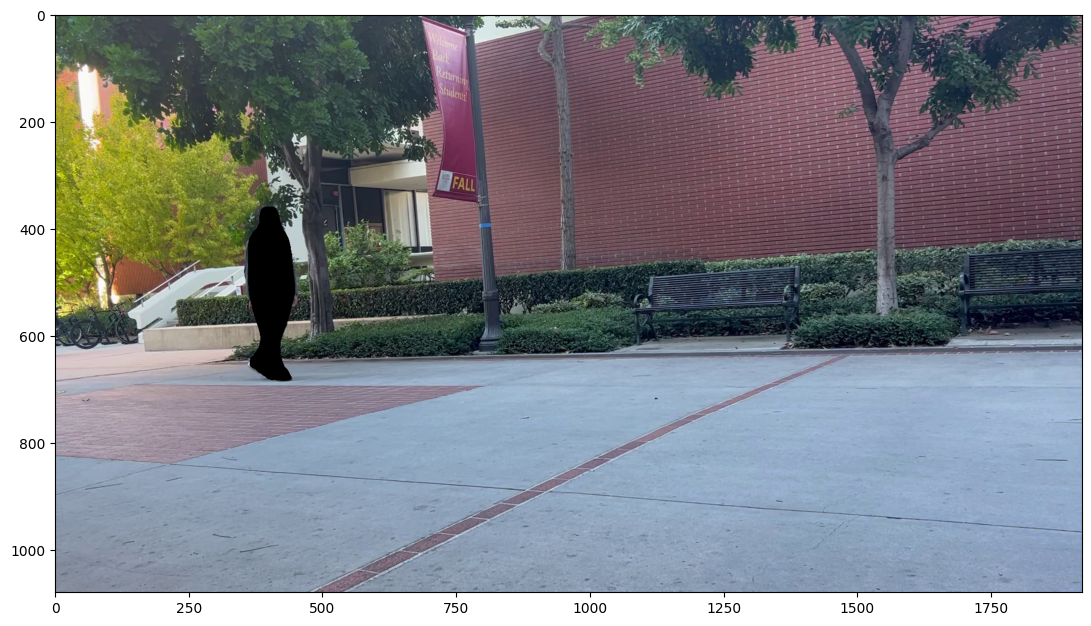

In [10]:
masked = frame.copy()
masked[outputs["instances"][outputs["instances"].pred_classes == 0].pred_masks[0] == True] = [0, 0, 0]
plt.figure(figsize=(15,7.5))
plt.imshow(masked[..., ::-1])

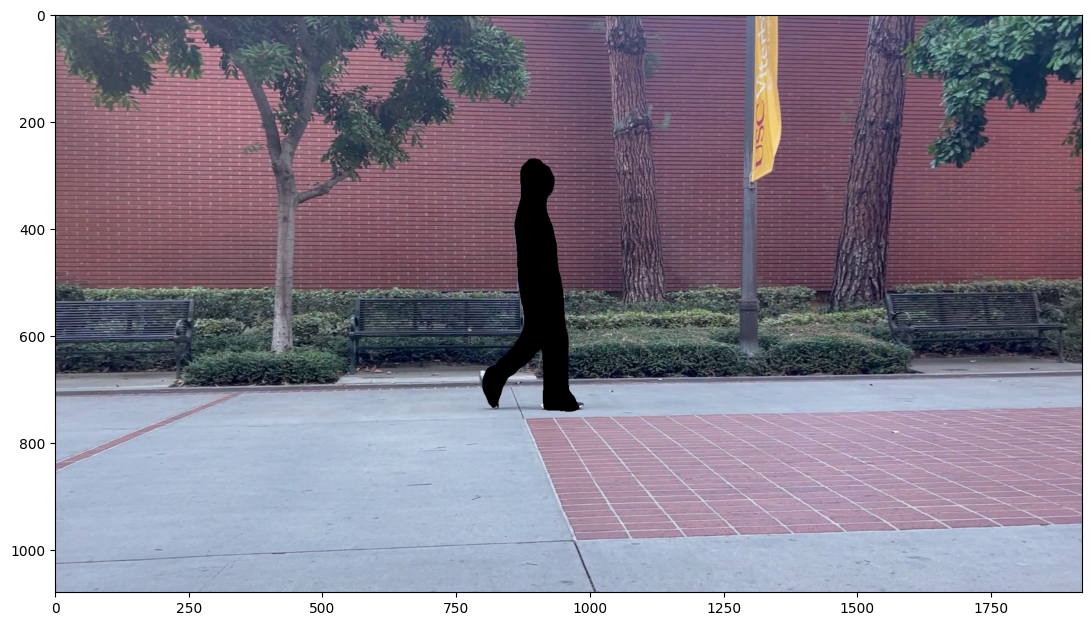

In [11]:
for i in range(200):
    _, frame2 = cap.read()
outputs = predictor(frame2[..., ::-1])
masked2 = frame2.copy()
masked2[outputs["instances"][outputs["instances"].pred_classes == 0].pred_masks[0] == True] = [0, 0, 0]
plt.figure(figsize=(15,7.5))
plt.imshow(masked2[..., ::-1])

(848, 480, 1)
{'person': 0, 'bicycle': 1, 'car': 2, 'motorcycle': 3, 'airplane': 4, 'bus': 5, 'train': 6, 'truck': 7, 'boat': 8, 'traffic light': 9, 'fire hydrant': 10, 'stop sign': 11, 'parking meter': 12, 'bench': 13, 'bird': 14, 'cat': 15, 'dog': 16, 'horse': 17, 'sheep': 18, 'cow': 19, 'elephant': 20, 'bear': 21, 'zebra': 22, 'giraffe': 23, 'backpack': 24, 'umbrella': 25, 'handbag': 26, 'tie': 27, 'suitcase': 28, 'frisbee': 29, 'skis': 30, 'snowboard': 31, 'sports ball': 32, 'kite': 33, 'baseball bat': 34, 'baseball glove': 35, 'skateboard': 36, 'surfboard': 37, 'tennis racket': 38, 'bottle': 39, 'wine glass': 40, 'cup': 41, 'fork': 42, 'knife': 43, 'spoon': 44, 'bowl': 45, 'banana': 46, 'apple': 47, 'sandwich': 48, 'orange': 49, 'broccoli': 50, 'carrot': 51, 'hot dog': 52, 'pizza': 53, 'donut': 54, 'cake': 55, 'chair': 56, 'couch': 57, 'potted plant': 58, 'bed': 59, 'dining table': 60, 'toilet': 61, 'tv': 62, 'laptop': 63, 'mouse': 64, 'remote': 65, 'keyboard': 66, 'cell phone': 6

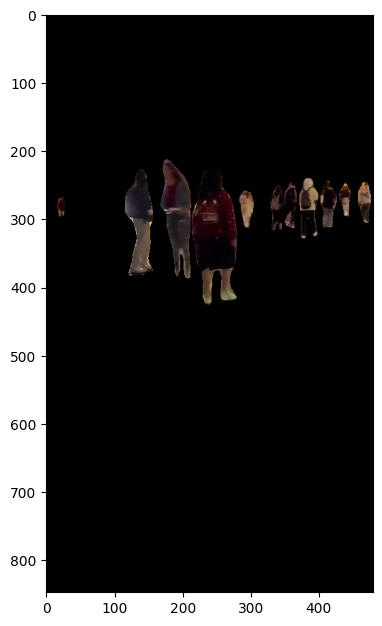

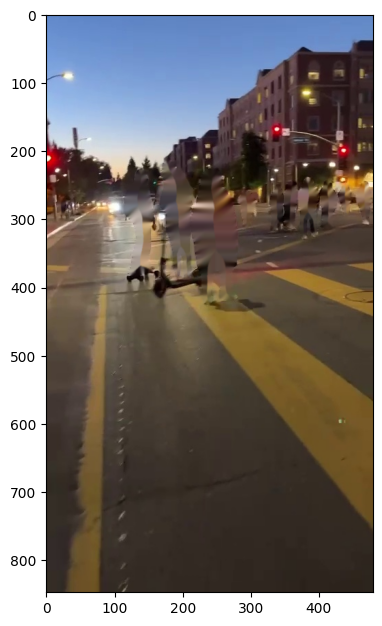

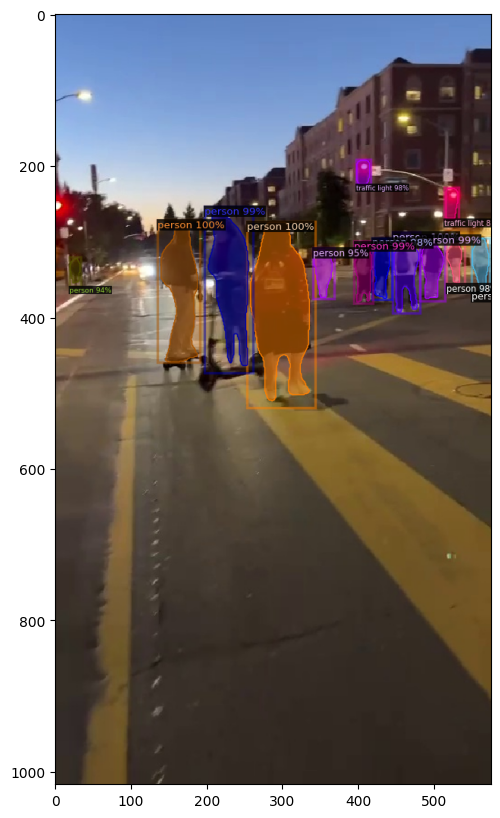

In [24]:
import torch
frame = cv2.imread("frames/video1/035.jpg")
height, width, _ = frame.shape
instances = predictor(frame)['instances']
masks = instances[instances.pred_classes == 0].pred_masks
masked = frame.copy()
background = frame.copy()
all_mask = torch.zeros((height, width)).bool().to(
        torch.device(cfg.MODEL.DEVICE))
for mask in masks:
    all_mask = torch.logical_or(all_mask, mask)
cpu_mask = all_mask.cpu()
masked[cpu_mask == False] = [0, 0, 0]
print(cpu_mask.to(torch.uint8).unsqueeze(-1).numpy().shape)
background = cv2.inpaint(background, cpu_mask.to(torch.uint8).unsqueeze(-1).numpy() ,3, cv2.INPAINT_NS)
plt.figure(figsize=(15,7.5))
plt.imshow(masked[..., ::-1])
plt.figure(figsize=(15,7.5))
plt.imshow(background[..., ::-1])
class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
pred_class_names = dict(zip(class_names, range(len(class_names))))
print(pred_class_names)
v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(instances.to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(out.get_image()[..., ::-1][..., ::-1])